# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
survived_no = titanic[(titanic['Survived'] == 0)]
survived_no.info()
survived_yes = titanic[(titanic['Survived'] == 1)]
survived_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Ticket       549 non-null    object 
 9   Fare         549 non-null    float64
 10  Cabin        68 non-null     object 
 11  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived

In [15]:
survived_no = survived_no.dropna()
survived_yes = survived_yes.dropna()

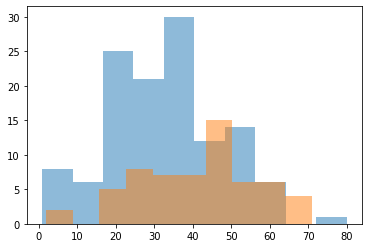

In [18]:
plt.hist(survived_yes['Age'], alpha=.5)
plt.hist(survived_no['Age'], alpha=.5)
plt.show()

In [16]:
print(stats.describe(survived_yes['Age']))
print(stats.describe(survived_no['Age']))

DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)
DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


In [17]:
stats.ttest_ind(survived_yes['Age'], survived_no['Age'])

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0005189503307881672)

In [19]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

     

In [20]:
get_95_ci(survived_yes['Age'], survived_no['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between 3.670662752222926 and 13.217629930703906.'

## Age is a factor for determining whether the person survived the titanic or not

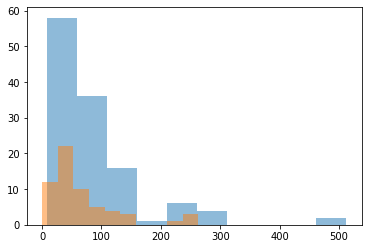

In [21]:
plt.hist(survived_yes['Fare'], alpha=.5)
plt.hist(survived_no['Fare'], alpha=.5)
plt.show()

In [22]:
print(stats.describe(survived_yes['Fare']))
print(stats.describe(survived_no['Fare']))

DescribeResult(nobs=123, minmax=(8.05, 512.3292), mean=85.82110650406504, variance=6698.362025553565, skewness=2.7788223952302076, kurtosis=10.470208979497217)
DescribeResult(nobs=60, minmax=(0.0, 263.0), mean=64.04826166666666, variance=3806.0826273061334, skewness=1.8178850690104182, kurtosis=3.0369847427015557)


In [23]:
stats.ttest_ind(survived_yes['Fare'], survived_no['Fare'])

Ttest_indResult(statistic=1.8225248632226043, pvalue=0.0700255771493731)

## Age does not have an effect on the Fare of a passenger